# Data 620 Assignment: High Frequency Words

Jithendra Seneviratne, Sheryl Piechocki 

June 23, 2020

In [1]:
%matplotlib inline
import pandas as pd
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request
from nltk.probability import FreqDist
import string
import re

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/120/120-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(raw.find("PART ONE--"))
print(raw.rfind("End of Project Gutenberg'"))


4276
372462


In [3]:
raw = raw[4276:372462]
# Count of words and punctuation symbols
print(len(raw))

368186


In [4]:
#raw

In [5]:
# clean up and remove punctuation
raw = raw.replace('-', ' ')
new_raw = re.sub(r'[^\w\s]', '', raw)


In [6]:
#new_raw

In [7]:
#break up the string into words 
tokens = word_tokenize(new_raw)

print(len(tokens))


68706


In [8]:
# Count of distinct words, or "word types" 
print(len(set(tokens))) 

6496


In [9]:
tokens[:10]

['PART', 'ONE', 'The', 'Old', 'Buccaneer', '1', 'The', 'Old', 'Sea', 'dog']

In [10]:
tokens_lower = [word.lower() for word in tokens]

In [11]:
fdist1 = FreqDist(tokens_lower)
print(fdist1)
fdist1.most_common(200)

<FreqDist with 5985 samples and 68706 outcomes>


[('the', 4365),
 ('and', 2874),
 ('a', 1751),
 ('i', 1748),
 ('of', 1674),
 ('to', 1521),
 ('was', 1135),
 ('in', 968),
 ('he', 901),
 ('that', 836),
 ('you', 825),
 ('had', 739),
 ('it', 707),
 ('his', 650),
 ('as', 622),
 ('my', 618),
 ('with', 616),
 ('for', 588),
 ('on', 507),
 ('but', 470),
 ('me', 430),
 ('at', 418),
 ('we', 417),
 ('all', 353),
 ('not', 350),
 ('were', 325),
 ('said', 323),
 ('this', 310),
 ('by', 304),
 ('him', 291),
 ('have', 282),
 ('one', 276),
 ('now', 271),
 ('so', 264),
 ('out', 253),
 ('man', 240),
 ('be', 240),
 ('they', 233),
 ('there', 231),
 ('from', 219),
 ('if', 216),
 ('up', 213),
 ('captain', 210),
 ('like', 207),
 ('silver', 205),
 ('is', 199),
 ('well', 193),
 ('no', 186),
 ('when', 182),
 ('or', 182),
 ('could', 174),
 ('what', 172),
 ('would', 169),
 ('us', 166),
 ('then', 165),
 ('been', 159),
 ('doctor', 159),
 ('here', 156),
 ('upon', 152),
 ('down', 148),
 ('more', 146),
 ('see', 142),
 ('them', 142),
 ('our', 139),
 ('before', 135),
 ('a

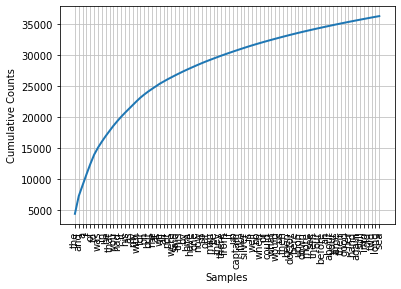

In [12]:
fdist1.plot(80, cumulative=True)

In [13]:
# remove stop words
from nltk.corpus import stopwords
filtered_token = [word for word in tokens_lower if word not in stopwords.words('english')]

In [14]:
fdist2 = FreqDist(filtered_token)
fdist2.most_common(200)

[('said', 323),
 ('one', 276),
 ('man', 240),
 ('captain', 210),
 ('like', 207),
 ('silver', 205),
 ('well', 193),
 ('could', 174),
 ('would', 169),
 ('us', 166),
 ('doctor', 159),
 ('upon', 152),
 ('see', 142),
 ('time', 131),
 ('good', 128),
 ('hand', 122),
 ('still', 120),
 ('old', 117),
 ('two', 116),
 ('long', 115),
 ('sea', 110),
 ('ill', 109),
 ('last', 109),
 ('back', 108),
 ('hands', 107),
 ('little', 104),
 ('cried', 103),
 ('men', 102),
 ('sir', 102),
 ('first', 99),
 ('come', 99),
 ('jim', 97),
 ('squire', 95),
 ('way', 93),
 ('know', 92),
 ('ship', 91),
 ('began', 90),
 ('came', 89),
 ('say', 89),
 ('lay', 89),
 ('made', 88),
 ('side', 88),
 ('much', 87),
 ('another', 86),
 ('dont', 85),
 ('take', 84),
 ('house', 84),
 ('round', 83),
 ('never', 83),
 ('thats', 81),
 ('island', 80),
 ('head', 80),
 ('get', 80),
 ('thought', 79),
 ('great', 79),
 ('john', 79),
 ('go', 77),
 ('got', 75),
 ('says', 74),
 ('enough', 74),
 ('dead', 73),
 ('sure', 73),
 ('right', 72),
 ('soon', 7